# TD2 part 1

Dans ce TD, nous allons construire un RNN from scratch avec Pytorch, en suivant les étapes suivantes:

- Sur un problème non-linéaire, nous allons construire un multi-layers perceptron
- Sur un problème de texte, nous utiliserons pytorch pour optimiser un RNN


In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import random

from tqdm import tqdm
from sklearn.model_selection import train_test_split

# Problème simple


## Données exemples

Nous allons construire des données $y = \beta^* X + b$


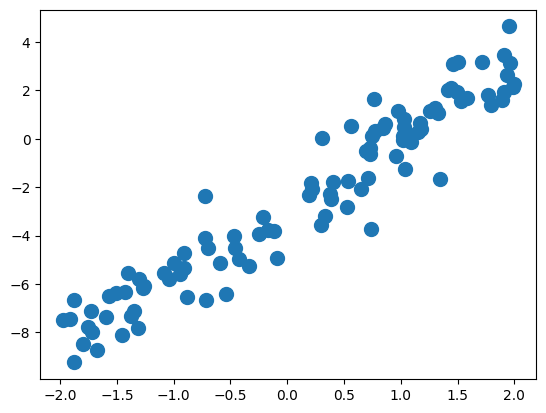

In [2]:
n = 100

a_star = 3.
b_star = -3.
noise_std = 1

x = (np.random.rand(n, 1) - 0.5) * 4
noise = np.random.normal(0, noise_std, (n, 1))
y = a_star * x + b_star + noise

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

xvec = x
plt.plot(x, y, 'o', markersize=10)

### Constuire l'optimizer

- Avec torch.nn.Parameter(), créer le paramètre beta qui sera optimisé. Les predictions du modèle sont égales à $\beta \times X$
- Avec torch.nn.MSELoss, déclarer la loss entre les prédictions et le résultat réel. loss.backward() pour mettre à jour les gradients
- Avec torch.optim.Adam, déclarer un optimizer
- Construisez la boucle qui, pour n_epochs, va reset les gradients, calculer la loss, mettre à jour les gradients et faire un pas pour optimiser beta


In [3]:
beta = torch.nn.Parameter(torch.randn(1, requires_grad=True))
criterion = torch.nn.MSELoss()

optimiser = torch.optim.Adam([beta], lr=0.1)

n_epochs = 10000

for epoch in range(n_epochs):
    optimiser.zero_grad()
    y_pred = beta * x
    loss = criterion(y_pred, y)
    loss.backward()
    optimiser.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: loss {loss.item()}")

Epoch 0: loss 18.884990692138672
Epoch 100: loss 8.9324369430542
Epoch 200: loss 8.93242359161377
Epoch 300: loss 8.93242359161377
Epoch 400: loss 8.93242359161377
Epoch 500: loss 8.93242359161377
Epoch 600: loss 8.93242359161377
Epoch 700: loss 8.93242359161377
Epoch 800: loss 8.93242359161377
Epoch 900: loss 8.93242359161377
Epoch 1000: loss 8.93242359161377
Epoch 1100: loss 8.93242359161377
Epoch 1200: loss 8.93242359161377
Epoch 1300: loss 8.93242359161377
Epoch 1400: loss 8.93242359161377
Epoch 1500: loss 8.93242359161377
Epoch 1600: loss 8.93242359161377
Epoch 1700: loss 8.93242359161377
Epoch 1800: loss 8.93242359161377
Epoch 1900: loss 8.93242359161377
Epoch 2000: loss 8.93242359161377
Epoch 2100: loss 8.93242359161377
Epoch 2200: loss 8.93242359161377
Epoch 2300: loss 8.93242359161377
Epoch 2400: loss 8.93242359161377
Epoch 2500: loss 8.93242359161377
Epoch 2600: loss 8.93242359161377
Epoch 2700: loss 8.93242359161377
Epoch 2800: loss 8.93242359161377
Epoch 2900: loss 8.932423

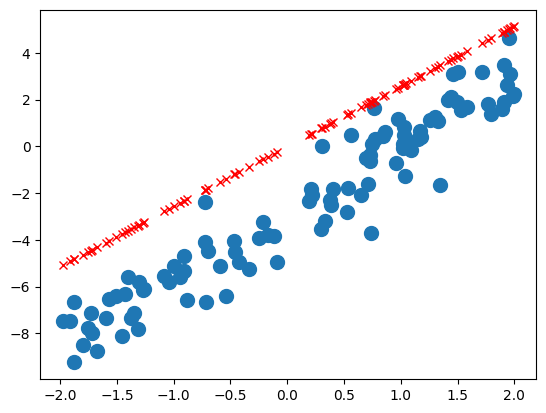

In [4]:
# Plot des predictions
plt.plot(x, y, 'o', markersize=10)

beta_x = beta * x
plt.plot(x, beta_x.detach().numpy(), 'rx')

# Multi-layers perceptron

## Données exemples

Ici, on a un modèle $y = ax² + b$


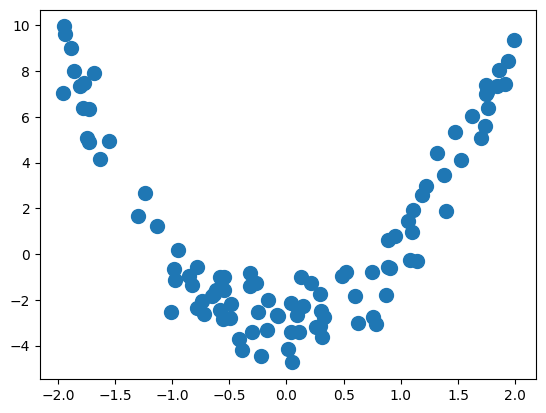

In [8]:
n = 100

a_star = 3.
b_star = -3.
noise_std = 1

x = (np.random.rand(n, 1) - 0.5) * 4
noise = np.random.normal(0, noise_std, (n, 1))
y = a_star * (x ** 2) + b_star + noise

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

xvec = x
plt.plot(x, y, 'o', markersize=10)

Nous allons construire un Pytorch modèle. Dans ce framework, on définit la fonction "forward" qui prend en argument les inputs et retourne les prédictions.

A l'aide de torch.nn.Module et de différentes layers (torch.nn.Linear, torch.nn.ReLU), terminez la classe ci-dessous pour créer un multi-layers perceptron


In [9]:
class MLP(torch.nn.Module):
    def __init__(self, input_size, layer_2_size):
        super().__init__()
        prev_size = input_size

        self.layer1 = torch.nn.Linear(input_size, layer_2_size)
        self.layer2 = torch.nn.Linear(layer_2_size, 1)

    def forward(self, X):
        X = self.layer1(X)
        X = torch.nn.functional.relu(X)
        X = self.layer2(X)

        return torch.nn.functional.relu(X)

En utilisant le travail précédent, faite une cellule utilisant un torch optimizer pour optimiser le MLP


In [10]:
input_size = 1
layer_2_size = 10

model = MLP(input_size, layer_2_size)
criterion = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.1)

for epoch in range(n_epochs):
    optimiser.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimiser.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: loss {loss.item()}")

Epoch 0: loss 17.468896865844727
Epoch 100: loss 3.7764203548431396
Epoch 200: loss 3.7758405208587646
Epoch 300: loss 3.7758400440216064
Epoch 400: loss 3.7758398056030273
Epoch 500: loss 3.7758398056030273
Epoch 600: loss 3.7758400440216064
Epoch 700: loss 3.7758400440216064
Epoch 800: loss 3.7758398056030273
Epoch 900: loss 3.7758405208587646
Epoch 1000: loss 3.7758405208587646
Epoch 1100: loss 3.777697801589966
Epoch 1200: loss 3.7758398056030273
Epoch 1300: loss 3.7758400440216064
Epoch 1400: loss 3.775852680206299
Epoch 1500: loss 3.7758400440216064
Epoch 1600: loss 3.7758398056030273
Epoch 1700: loss 3.7759058475494385
Epoch 1800: loss 3.7758405208587646
Epoch 1900: loss 3.7758405208587646
Epoch 2000: loss 3.7758562564849854
Epoch 2100: loss 3.7758400440216064
Epoch 2200: loss 3.7758448123931885
Epoch 2300: loss 3.7761049270629883
Epoch 2400: loss 3.7760801315307617
Epoch 2500: loss 3.7760469913482666
Epoch 2600: loss 3.780121088027954
Epoch 2700: loss 3.7790720462799072
Epoch 2

# Problème de texte

On a des données prénom -> pays d'origine.
On veut utiliser un réseau de neurones qui, pour un nom, va prédire le pays d'origine en utilisant la suite de caractères.


## Extraction des données

Vous trouverez [ici](https://download.pytorch.org/tutorial/data.zip) un zip avec des fichiers \[nationalité\].txt contenant des prénoms pour chaque nationalité. <br/>
Nous allons avoir un jeu de données pays -> prénoms.


In [11]:
# Code pour générer le jeu de données
# En admettant que les fichiers ont été extraits dans data/raw/names/

import math
import numpy as np
from pathlib import Path
import random
import string
import time
import unicodedata

path = Path("../data/raw/names/")

In [12]:
def read_names(path):
    country_to_names = {}
    for file in path.iterdir():
        if not file.name.endswith(".txt"):
            continue

        with open(file) as f:
            names = [unicodeToAscii(line.strip()) for line in f]

        country = file.stem
        country_to_names[country] = names

    return country_to_names


# Handling ASCII stuff
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427


def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [13]:
country_to_names = read_names(path)

## Transformation des prénoms en features

On va one-hot encode les lettres des prénoms. <br/>
Si on utilisait "a" ayant comme indice 0, "b" indice 1, ... "z" indice 25, <br/>
le prénom "abby" aurait les index suivants [0, 1, 1, 24], <br/>
ou la matrice: <br/>
[ <br/>
\[1, 0, ..., 0, 0\] <br/>
\[0, 1, ..., 0, 0\] <br/>
\[0, 1, ..., 0, 0\] <br/>
\[0, 0, ..., 1, 0\] <br/>
] <br/>

Dans les prénoms, nous avons des caractères spéciaux (comme "ö", "é", etc), donc nous utiliserons la table ASCII pour traduire les lettres en indice


In [14]:
char_to_idx = {chr(i): i for i in range(128)}


def name_to_indices(name):
    return [char_to_idx[char] for char in name if char in char_to_idx]


def one_hot_encode(indices, num_classes=128, max_length=10):
    output_width = max(len(indices), max_length)
    one_hot_matrix = torch.zeros((output_width, num_classes))
    for i, index in enumerate(indices):
        if i < max_length:
            one_hot_matrix[i, index] = 1
    return one_hot_matrix


name = ["abby", "rémy"]

for n in name:
    print(name_to_indices(n))
    print(one_hot_encode(name_to_indices(n)))

[97, 98, 98, 121]
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
[114, 109, 121]
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


## Jouons un peu avec les RNN

Le RNN (Recurrent neural network) est prévu pour prendre une série d'inputs et prédire un output.


In [15]:
# La table ascii a 128 caractères, une lettre one-hot encodée est donc un vecteur de taille 128
# Les inputs seront de tailles 128
model = torch.nn.RNN(input_size=128, hidden_size=1)
# Hidden_size est la dimension de l'output

In [16]:
# La lettre "a" est l'indice 97 dans la table ascii
letter_a = torch.zeros((1, 128))
letter_a[0][97] = 1

output, hidden = model(letter_a)
output

tensor([[0.0118]], grad_fn=<SqueezeBackward1>)

In [17]:
# Le prénom "Abby" est une suite de 4 lettres# La lettre "a" est l'indice 97 dans la table ascii
name_abby = torch.zeros((1, 4, 128))
name_abby[0][0][97] = 1
name_abby[0][1][98] = 1
name_abby[0][2][98] = 1
name_abby[0][2][121] = 1

output, hidden = model(name_abby)
# On a un output pour chaque lettre. On considère que l'output de la dernière lettre est la nationalité à trouver
output

tensor([[[ 0.0118],
         [ 0.2775],
         [ 0.4761],
         [-0.2389]]], grad_fn=<StackBackward0>)

## Un RNN et une loss pour notre dataset

Nous avons un problème de classification, nous allons utiliser la cross-entropy loss.

Dans notre problème, nous avons 18 classes différentes (18 nationalités).
Pour un prénom, notre réseau de neurones devra sortir la probabilité que le nom appartienne à chaque pays (un vecteur de taille 18, dont la somme fait 1).

Notre réseau aura donc un output de taille 18, et nous appliquerons la fonction softmax pour en faire des probabilités (la somme des 18 outputs fera 1). <br/>
Fonction softmax:

$ \sigma(x)_i = \frac{e^{x_i}}{\sum_{j=0}^{K} e^{x_j}} $


In [18]:
model = torch.nn.RNN(input_size=128, hidden_size=18)
loss = torch.nn.CrossEntropyLoss()

In [19]:
output, hidden = model(name_abby)

output.shape

torch.Size([1, 4, 18])

In [20]:
# Shape est 1 (un prénom), 4 (4 lettres), 18 (une valeur pour chacune des nationalités)

# On utilise l'output de la dernière lettre
output = output[:, -1, :]

proba = torch.nn.functional.softmax(output)
proba

/var/folders/m6/rk07m5457kn3ftdh9srr0wtw0000gn/T/ipykernel_12503/668213069.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  proba = torch.nn.functional.softmax(output)


tensor([[0.0483, 0.0645, 0.0418, 0.0592, 0.0453, 0.0680, 0.0580, 0.0751, 0.0490,
         0.0629, 0.0394, 0.0549, 0.0711, 0.0417, 0.0670, 0.0700, 0.0386, 0.0450]],
       grad_fn=<SoftmaxBackward0>)

In [21]:
# Pour différents label (nationalité du prénom "Abby"), on a différentes cross-entropy loss
y = torch.zeros((1))
y = y.type(torch.LongTensor)
y[0] = 1

loss(proba, y)

tensor(2.8815, grad_fn=<NllLossBackward0>)

In [22]:
y[0] = 13

loss(proba, y)

tensor(2.9043, grad_fn=<NllLossBackward0>)

# Votre tour

Maintenant que nous avons des données, un modèle et une loss:

- Séparez vos données en train & test
- Faites une loop tirant au hasard des noms avec leur nationalité, calculez la sortie du réseau de neurones, sa loss, le gradient, et faites un step pour l'optimiser
- Une fois que vous avez un modèle qui marche, testez d'autres architectures de réseaux de neurones pour avoir le meilleur résultat.


In [23]:
def make_dataset(country_to_names: dict):
    data = []
    for country, name in country_to_names.items():
        for n in name:
            data.append((n, country))

    df = pd.DataFrame(data, columns=["name", "country"])

    train_df, test_df = train_test_split(
        df, test_size=0.2, random_state=42, stratify=df["country"])

    train_df.to_csv(path / "train.csv", index=False)
    test_df.to_csv(path / "test.csv", index=False)

In [24]:
make_dataset(country_to_names)

In [37]:
class NameClassifierRNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NameClassifierRNN, self).__init__()
        self.rnn = torch.nn.RNN(input_size, hidden_size)
        self.fc = torch.nn.Linear(hidden_size, output_size)
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, X):
        output, _ = self.rnn(X)
        output = output[:, -1, :]
        output = self.fc(output)
        return output

In [38]:
names_country_train = pd.read_csv(path / "train.csv")
X = names_country_train["name"].apply(name_to_indices)
X = [one_hot_encode(x) for x in X]

y = names_country_train["country"]
y = y.apply(lambda x: list(country_to_names.keys()).index(x))

names_country_test = pd.read_csv(path / "test.csv")
X_test = names_country_test["name"].apply(name_to_indices)
X_test = [one_hot_encode(x) for x in X_test]

y_test = names_country_test["country"]
y_test = y_test.apply(lambda x: list(country_to_names.keys()).index(x))

In [70]:
input_size = 128
hidden_size = 256
output_size = len(country_to_names)
n_epochs = 10000

In [71]:
model = NameClassifierRNN(input_size, hidden_size, output_size)
criterion = torch.nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.001)
y_train = torch.tensor(y)

for i in tqdm(range(n_epochs)):
    model.train()
    random_idx = random.randint(0, len(X) - 1)
    name = X[random_idx]
    label = y_train[random_idx]

    name = name.unsqueeze(0)

    optimiser.zero_grad()
    output = model(name)
    loss = criterion(output, label.unsqueeze(0))
    loss.backward()
    optimiser.step()

100%|██████████| 10000/10000 [00:03<00:00, 2570.60it/s]


In [72]:
model.eval()
with torch.no_grad():
    correct = 0
    total = len(X_test)

    for (name, label) in zip(X_test, y_test):
        name = name.unsqueeze(0)
        output = model(name)
        _, predicted = torch.max(output, 1)
        if predicted == label:
            correct += 1

    print(f"Accuracy: {100 * (correct / total):.2f}%")

Accuracy: 46.85%


In [73]:
class NameClassifierLSTM(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NameClassifierLSTM, self).__init__()
        self.lstm = torch.nn.LSTM(input_size, hidden_size)
        self.fc = torch.nn.Linear(hidden_size, output_size)
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, X):
        output, _ = self.lstm(X)
        output = output[:, -1, :]
        output = self.fc(output)
        return output

In [74]:
model = NameClassifierLSTM(input_size, hidden_size, output_size)
criterion = torch.nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.001)

for i in tqdm(range(n_epochs)):
    model.train()
    random_idx = random.randint(0, len(X) - 1)
    name = X[random_idx]
    label = y_train[random_idx]

    name = name.unsqueeze(0)

    optimiser.zero_grad()
    output = model(name)
    loss = criterion(output, label.unsqueeze(0))
    loss.backward()
    optimiser.step()

100%|██████████| 10000/10000 [00:07<00:00, 1353.62it/s]


In [75]:
model.eval()
with torch.no_grad():
    correct = 0
    total = len(X_test)

    for (name, label) in zip(X_test, y_test):
        name = name.unsqueeze(0)
        output = model(name)
        _, predicted = torch.max(output, 1)
        if predicted == label:
            correct += 1

    print(f"Accuracy: {100 * (correct / total):.2f}%")

Accuracy: 46.85%


In [76]:
class NameClassiiferGRU(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NameClassiiferGRU, self).__init__()
        self.gru = torch.nn.GRU(input_size, hidden_size)
        self.fc = torch.nn.Linear(hidden_size, output_size)
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, X):
        output, _ = self.gru(X)
        output = output[:, -1, :]
        output = self.fc(output)
        return output

In [77]:
model = NameClassiiferGRU(input_size, hidden_size, output_size)
criterion = torch.nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.001)

for i in tqdm(range(n_epochs)):
    model.train()
    random_idx = random.randint(0, len(X) - 1)
    name = X[random_idx]
    label = y_train[random_idx]

    name = name.unsqueeze(0)

    optimiser.zero_grad()
    output = model(name)
    loss = criterion(output, label.unsqueeze(0))
    loss.backward()
    optimiser.step()

100%|██████████| 10000/10000 [00:06<00:00, 1641.62it/s]


In [78]:
model.eval()
with torch.no_grad():
    correct = 0
    total = len(X_test)

    for (name, label) in zip(X_test, y_test):
        name = name.unsqueeze(0)
        output = model(name)
        _, predicted = torch.max(output, 1)
        if predicted == label:
            correct += 1

    print(f"Accuracy: {100 * (correct / total):.2f}%")

Accuracy: 46.87%
